In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import normalize

In [25]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()  
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [20]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

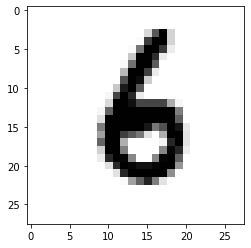

In [21]:
from random import randint
from matplotlib import pyplot

%matplotlib inline

# protip - visually inspect your data
i = randint(0, x_train.shape[0])
pyplot.imshow(x_train[i], cmap='gray_r');

In [26]:
x_train = x_train.astype("float32") / 255  # scales data between 0 and 1
x_test = x_test.astype("float32") / 255  # scales data between 0 and 1
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [32]:
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3), input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) 
# Train model
#adam = tf.train.AdamOptimizer()
#model.compile(loss='categorical_crossentropy',
#              optimizer=adam,
#              metrics=['top_k_categorical_accuracy'])
#print(model.summary())

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 64s 33ms/step - loss: 0.3410 - accuracy: 0.8938
Epoch 2/3
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0468 - accuracy: 0.9854
Epoch 3/3
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0308 - accuracy: 0.9902


In [ ]:
pred = model.predict(x_test)
val_loss, val_acc = model.evaluate(x_test, y_test)  
print(val_loss)
print(val_acc)

In [ ]:
index = 2006
pyplot.imshow(x_test[index], cmap = 'gray_r')
print("prediction", max([(v, k) for k, v in enumerate(pred[index])])[1])